In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py pyyaml
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn
import yaml as yaml

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k", "axes.linewidth":2.})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0.1,
                            "font.family":"Helvetica", "axes.labelsize":20.,"xtick.labelsize":18.,
                            "ytick.labelsize":18., "legend.fontsize":12.,"title.labelsize":14.}) # https://seaborn.pydata.org/tutorial/aesthetics.html

colors = sns.color_palette("colorblind", 8) #https://seaborn.pydata.org/tutorial/color_palettes.html

display(colors)
# color key: main element = 'k', additional elements = colors[0,1,2,...], fermi = colors[6], kpoints = colors[7]
# have dft='k' 'solid'; gfn1=colors[10] 'dotted'; gfn2=colors[11] 'dashed'

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0),
 (0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0)]

density of states plot

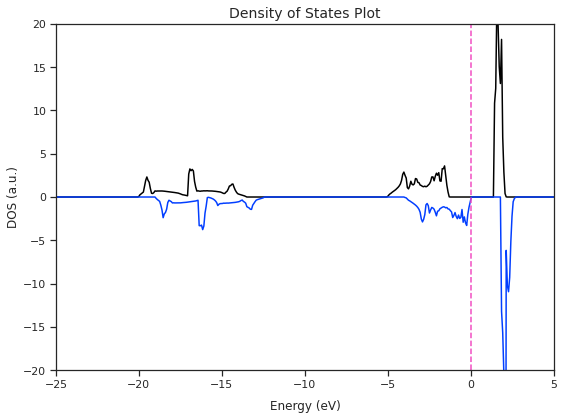

In [7]:
# density of states
dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_TDOS.dat'))
fig = plt.figure(figsize=(8,6))
fermi = 0 # abs(((-1.30344) - (1.42856))/2)
plt.plot(dos[:,0]-fermi, dos[:,1], color='black')
plt.plot(dos[:,0]-fermi, dos[:,2], color=colors[0])
plt.vlines(0,-20,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('Energy (eV)',  labelpad = 10,fontsize=12)
plt.ylabel('DOS (a.u.)', labelpad = 3,fontsize=12)
plt.ylim(-20,20)
plt.xlim(-25,5)
plt.title('Density of States Plot', fontsize=14)
#plt.savefig('./plot-fig/CeO2_VASP_TDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

vasp band structure

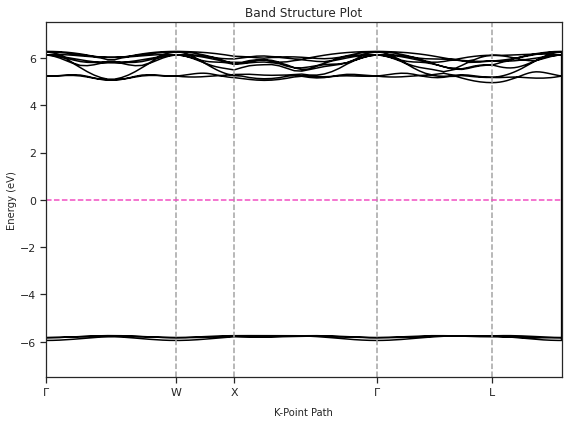

In [3]:
# band structure
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_BAND.dat'))
fermi = -6.327715

kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpath[1:-1],-7.5,7.5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,6.3279,color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(0,6.3278)
plt.ylim(-7.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=10)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=10)
plt.title('Band Structure Plot', fontsize=12)
#plt.savefig('./plot-fig/Xe_VASP_BAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

vasp band structure and density of states composite

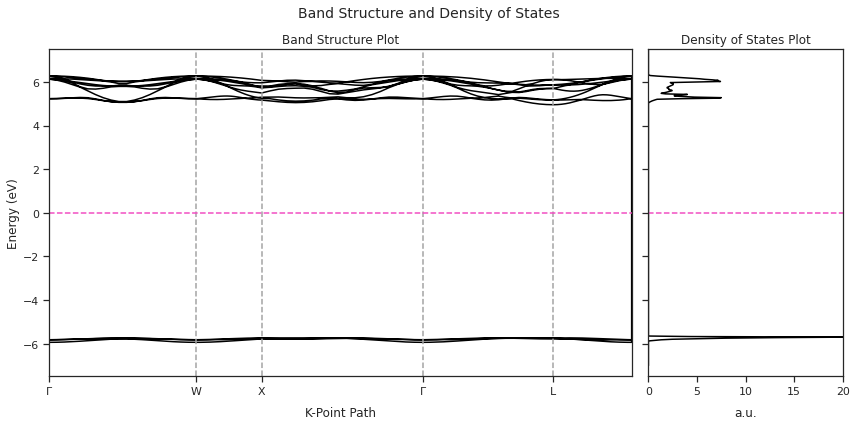

In [9]:
# band structure and density of states
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Band Structure and Density of States',fontsize=14)
plt.subplot(121)
dos = np.array(np.loadtxt('./plot-src/Xe_VASP_TDOS.dat'))
bands = np.array(np.loadtxt('./plot-src/Xe_VASP_BAND.dat'))
fermi = -6.327715

kpts = [[0,0,0],[0,1,0],[0.5,0.75,0.25],[0,0,0],[0.5,0.5,0.5],[0,1,0]]
kpath = [bands[0,0],bands[19,0],bands[39,0],bands[59,0],bands[79,0],bands[99,0]]
plt.plot(bands[:,0], bands[:,1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','W','X','\u0393','L','X'])
plt.vlines(kpath[1:-1],-7.5,7.5,color=colors[7],linestyle='dashed')
plt.hlines(0,0,6.3279,color=colors[6],linestyle='dashed',label='fermi')
plt.xlim(0,6.3278)
plt.ylim(-7.5,7.5)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=12)
plt.ylabel('Energy (eV)', labelpad = 3,fontsize=12)
plt.title('Band Structure Plot', fontsize=12)

plt.subplot(122) # not sure how to make less wide
plt.plot(dos[:,1]/5, dos[:,0]-(fermi), color='black')
plt.hlines(0,0,20,color=colors[6],linestyle='dashed',label='Fermi')
plt.xlabel('a.u.',  labelpad = 10,fontsize=12)
plt.ylim(-7.5,7.5)
plt.xlim(0,20)
plt.title('Density of States Plot', fontsize=12)

#plt.savefig('./plot-fig/Xe_VASP_Composite.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

## Phonopy

Phonon TDOS

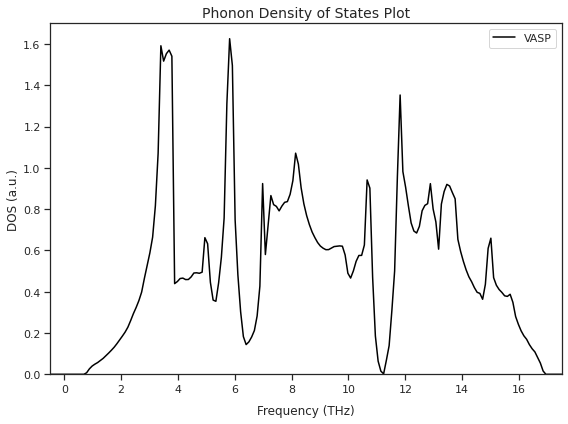

In [5]:
# phonon density of states
fig = plt.figure(figsize=(8,6))
pydos = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononTDOS.dat')) # is fermi significant here? I don't think so
plt.plot(pydos[:,0], pydos[:,1], color='k', label='VASP')
plt.xlabel('Frequency (THz)',  labelpad = 10,fontsize=12)
plt.ylabel('DOS (a.u.)', labelpad = 3,fontsize=12)
plt.ylim(0,1.7)
plt.xlim(-0.5,17.5)
plt.legend()
plt.title('Phonon Density of States Plot', fontsize=14)
#plt.savefig('./plot-fig/CeO2_VASP_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

Superimposed Phonon TDOS

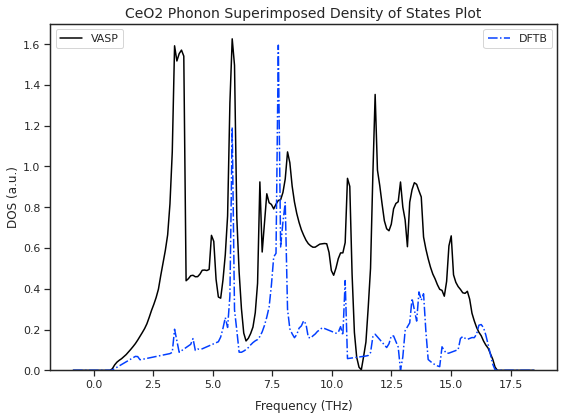

In [75]:
# superimposed phonon DOS plots
# to plot superimposed, normalize one axis, then plot the 'twin' version of the other axis, then hide the extra axis
fig, ax1 = plt.subplots(figsize=(8,6))
VASP_dos = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononTDOS.dat'))
DFTB_dos = np.array(np.loadtxt('./plot-src/CeO2_DFTB_phononTDOS.dat'))
ax1.set_xlabel('Frequency (THz)',  labelpad = 10,fontsize=12)
ax1.set_ylabel('DOS (a.u.)', labelpad = 3,fontsize=12)
ax1.plot(VASP_dos[:,0], VASP_dos[:,1], color='k', label='VASP')
plt.legend(loc=2)

ax2 = ax1.twiny()  # instantiate a second Axes that shares the same y-axis
ax2.plot(DFTB_dos[:,0], DFTB_dos[:,1]*1142.85, color=colors[0],linestyle='dashdot', label='DFTB')
ax2.tick_params(axis='x')
ax2.get_xaxis().set_visible(False) # hide the extra axes
plt.legend(loc=1)


plt.ylim(0,1.7)
plt.title('CeO2 Phonon Superimposed Density of States Plot', fontsize=14)
#plt.savefig('./plot-fig/CeO2_Superimposed_phononTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

Phonon Bands

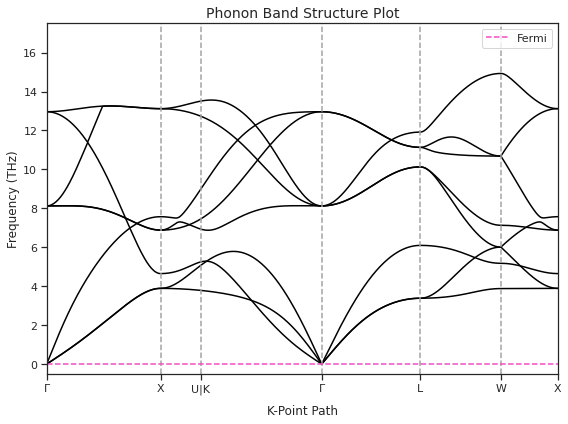

In [7]:
# Phonon band structure
fig = plt.figure(figsize=(8,6))
bands = np.array(np.loadtxt('./plot-src/CeO2_VASP_phononBAND.dat'))
fermi = 0#-6.327715
# $\Gamma$ X U|K $\Gamma$ L W X
kpath = [bands[0,0],bands[100,0],bands[201,0],bands[302,0],bands[403,0],bands[504,0],bands[605,0]]
plt.plot(bands[:,0], bands[:,1:-1]-(fermi), color='black')
plt.xticks(kpath,['\u0393','X','U|K','\u0393','L','W','X'])
plt.vlines(kpath[1:-1],-.5,17.5,color=colors[7],linestyle='dashed')
plt.hlines(0,bands[0,0],bands[605,0],color=colors[6],linestyle='dashed',label='Fermi')
plt.xlim(bands[0,0],bands[605,0])
plt.ylim(-.5,17.5)
plt.xlabel('K-Point Path', labelpad = 10,fontsize=12)
plt.ylabel('Frequency (THz)', labelpad = 3,fontsize=12)
plt.legend()
plt.title('Phonon Band Structure Plot', fontsize=14)
#plt.savefig('./plot-fig/CeO2_VASP_phononBAND.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

## phono3py

phono3py thermal conductivity

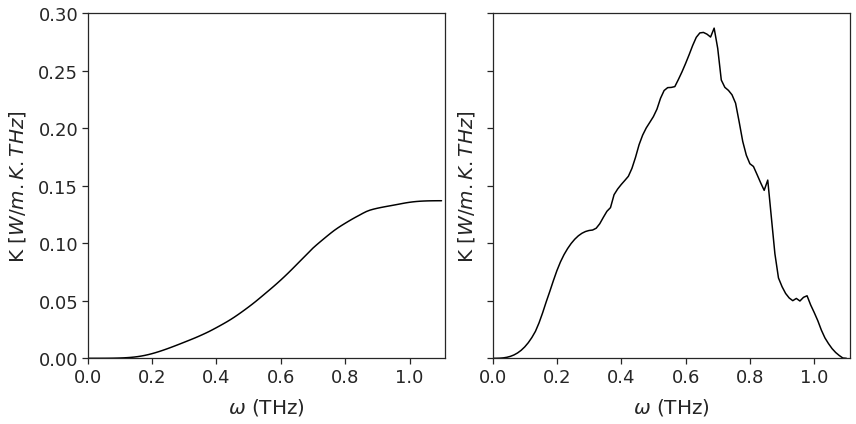

In [34]:
# Thermal Conductivity 
#tc = np.array(np.loadtxt('/gscratch/ajense28/Phono3py/vasp-Xe/kaccum.dat'))
tc = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyTC.dat'))
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True,figsize=(12,6),gridspec_kw={'width_ratios': [1, 1]})
#print(tc)
plt.subplot(121)
plt.plot(tc[:,0],(tc[:,1]+tc[:,2]+tc[:,3])/3, color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10) 
plt.ylabel(r"Κ $[W/m.K.THz]$",  labelpad = 10)
plt.xlim(tc[0,0],tc[-1,0]+0.01)
plt.ylim(0,0.3)
plt.subplot(122) # not sure how to make less wide
plt.plot(tc[:,0],(tc[:,7]+tc[:,8]+tc[:,9])/3, color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10) 
plt.ylabel(r"Κ $[W/m.K.THz]$",  labelpad = 10)
plt.xlim(tc[0,0],tc[-1,0]+0.01)
plt.ylim(0,0.3)
#plt.legend()
#plt.title('Xenon Thermal Conductivity (Phono3py)')
#plt.savefig('./plot-fig/Xe_VASP_phono3pyTC.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

phono3py mean free path

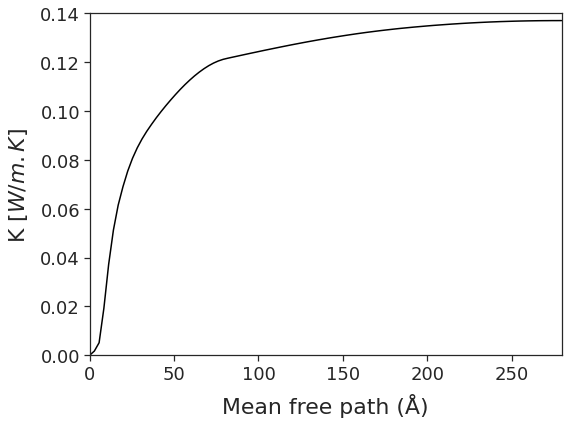

In [31]:
# Mean Free Path
mfp = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyMFP.dat'))
fig = plt.figure(figsize=(8,6))
plt.plot(mfp[:,0],mfp[:,1], color='black')
plt.xlabel(r'Mean free path (Å)',  labelpad = 10,fontsize=22) 
plt.ylabel(r"Κ $[W/m.K]$",  labelpad = 10,fontsize=22)
plt.xlim(mfp[0,0],mfp[-1,0]+0.01)
plt.ylim(0,0.14)
#plt.legend(fontsize=14)
#plt.title('Xenon Mean Free Path (Phono3py)', fontsize=14)
#plt.savefig('./plot-fig/Xe_VASP_phono3pyMFP.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

phono3py TDOS

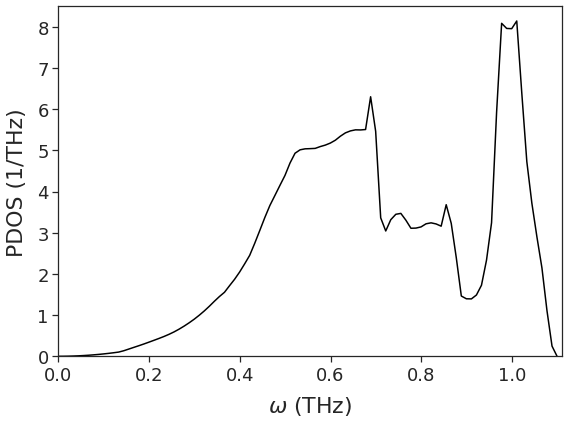

In [33]:
# phono3py TDOS
tdos = np.array(np.loadtxt('./plot-src/Xe_VASP_phono3pyTDOS.dat'))
fig = plt.figure(figsize=(8,6))
plt.plot(tdos[:,0],tdos[:,2], color='black')
plt.xlabel(r'$\omega$ (THz)',  labelpad = 10,fontsize=22) 
plt.ylabel(r"PDOS (1/THz)",  labelpad = 10,fontsize=22)
plt.xlim(tdos[0,0],tdos[-1,0]+0.01)
plt.ylim(0,8.5)
#plt.legend(fontsize=14)
#plt.title('Xenon Total Density of States (Phono3py)', fontsize=14)
#plt.savefig('./plot-fig/Xe_VASP_phono3pyTDOS.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show() #plt.close() # 

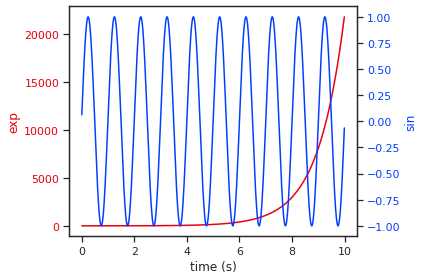

In [8]:
# superimpose data from matplotlib wiki https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = colors[3]
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = colors[0]
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()